# BH-REM: Black-Hole Remnant Estimation using Machine Learning

This notebook presents a **Master’s-level exploratory study** on the application of **introductory machine learning techniques** to **numerical relativity data** describing **binary black hole mergers**. Using publicly available simulation catalogs, we examine whether relatively simple models can learn meaningful relationships between **physical input parameters** - such as component masses and spins - and **properties of the final black hole remnants**.

## Scientific Background

**Gravitational waves** are ripples in spacetime produced by accelerating massive objects, most notably merging black holes. The most accurate theoretical descriptions of these systems come from **numerical relativity simulations**, which solve Einstein’s equations directly. While highly precise, these simulations are **computationally expensive**, motivating interest in data-driven approaches that can interpolate or approximate their results.

## Motivation and Scope

The goal of this notebook is to explore whether **basic machine learning models** can capture relationships between binary black hole parameters and simulation-derived quantities when trained on numerical relativity catalogs.  

The emphasis is **educational and conceptual** rather than on achieving state-of-the-art predictive performance. In particular, this work highlights the **end-to-end machine learning workflow** - from data ingestion to model evaluation - within a physics-informed context.

## Contents of This Notebook

This notebook covers the following steps:

1. **Data loading and inspection**
2. **Dimensionality reduction and visualization** using Principal Component Analysis (PCA)
3. **Supervised learning tasks**, including regression and classification, using:
   - Linear Regression  
   - Logistic Regression  
   - Decision Trees  
   - Support Vector Machines (SVMs)  
   - Neural Networks  

Through these examples, the notebook demonstrates how standard machine learning tools can be applied to complex scientific data while maintaining physical interpretability and clarity.

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as seabornInstance

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import metrics

import plotly.express as px

### Data Description and Loading

The dataset used in this study is derived from publicly available numerical relativity catalogs of binary black hole mergers.

The parameters considered include physical quantities such as component masses and spins. Only a subset of available parameters is used, consistent with the exploratory nature of this work.

In this section, the numerical relativity data is loaded into Pandas DataFrames for inspection and analysis.


In [2]:
# Reading mass and spin datasets, and diplaying them

massdf = pd.read_csv("data/mass.csv")
display(massdf)

spindf = pd.read_csv("data/spin.csv")
display(spindf)

,M1/M2,Spin1x,Spin1y,Spin1z,Spin2x,Spin2y,Spin2z,Fmass,Fmnorm,Fmint
0,0.999999,-5.150000e-10,1.370000e-09,0.998001,2.760000e-10,-2.120000e-09,0.998001,0.882780,0.000000,0.000000
1,1.000000,4.710000e-09,2.310000e-10,0.994246,-4.740000e-09,-5.790000e-10,0.994247,0.886689,0.033992,0.679831
2,1.000000,6.030000e-08,2.920000e-09,0.989253,-5.930000e-08,-4.350000e-09,0.989253,0.887654,0.042383,0.847667
3,1.000000,3.520000e-08,-2.470000e-08,0.979413,-3.560000e-08,2.370000e-08,0.979413,0.889234,0.056125,1.122503
4,1.000000,1.890000e-09,-4.820000e-09,0.969504,-2.340000e-09,5.480000e-09,0.969504,0.890691,0.068790,1.375794
...,...,...,...,...,...,...,...,...,...,...
2673,7.953246,2.760000e-07,-1.700000e-07,-0.800141,2.530000e-08,1.070000e-07,-0.458841,0.992704,0.955806,19.116127
2674,7.997929,-3.770000e-07,-9.400000e-07,-0.900407,1.500000e-07,-9.140000e-08,-0.000021,0.992806,0.956690,19.133807
2675,7.997128,-1.170000e-06,6.360000e-07,-0.799957,-6.500000e-07,-2.150000e-07,-0.798880,0.992953,0.957970,19.159402
2676,9.996348,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.995605,0.981031,19.620610


,M1/M2,Spin1x,Spin1y,Spin1z,Spin2x,Spin2y,Spin2z,Fspin,Fsnorm,Fsint
0,5.995917,0.000000e+00,0.000000e+00,-0.000002,0.000000e+00,0.000000e+00,-0.834504,-0.172301,0.000000,0.000000
1,4.995746,0.000000e+00,0.000000e+00,-0.500049,0.000000e+00,0.000000e+00,-0.851385,-0.105807,0.059212,1.184245
2,4.995736,0.000000e+00,0.000000e+00,0.500033,0.000000e+00,0.000000e+00,-0.851395,-0.090347,0.072980,1.459602
3,4.998304,0.000000e+00,0.000000e+00,-0.800436,0.000000e+00,0.000000e+00,-0.800898,-0.079520,0.082621,1.652422
4,4.996993,0.000000e+00,0.000000e+00,0.000002,0.000000e+00,0.000000e+00,-0.800894,-0.067330,0.093476,1.869522
...,...,...,...,...,...,...,...,...,...,...
2673,1.000000,1.890000e-09,-4.820000e-09,0.969504,-2.340000e-09,5.480000e-09,0.969504,0.944963,0.994922,19.898434
2674,1.000000,3.520000e-08,-2.470000e-08,0.979413,-3.560000e-08,2.370000e-08,0.979413,0.946958,0.996698,19.933968
2675,1.000000,6.030000e-08,2.920000e-09,0.989253,-5.930000e-08,-4.350000e-09,0.989253,0.948927,0.998452,19.969042
2676,1.000000,4.710000e-09,2.310000e-10,0.994246,-4.740000e-09,-5.790000e-10,0.994247,0.949931,0.999346,19.986911


### Principal Component Analysis (PCA)

To better understand the structure of the data, dimensionality reduction techniques are applied. Principal Component Analysis (PCA) is used primarily for visualization and qualitative assessment.

The same feature set exists in both datasets, so PCA results are equivalent when applied to either.

In [3]:
# Feature columns used for PCA and ML models

features = [
    'M1/M2',
    'Spin1x', 'Spin1y', 'Spin1z',
    'Spin2x', 'Spin2y', 'Spin2z'
]

# Extracting features and targets

mx = massdf.loc[:, features].values
sx = spindf.loc[:, features].values
my = massdf.loc[:, ['Fmass']].values
sy = spindf.loc[:, ['Fspin']].values

# Standardizing features

mx = StandardScaler().fit_transform(mx)
sx = StandardScaler().fit_transform(sx)

display(pd.DataFrame(data=mx, columns=features))
#or pd.DataFrame(data = sx, columns = features) gives same results since feautres are same to both

# Applying PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mx)

principalDf = pd.DataFrame(
    data=principalComponents,
    columns=['PC1', 'PC2']
)

# Combining PCA output with target variables

mPrinDf = pd.concat([principalDf, massdf['Fmass']], axis=1)
sPrinDf = pd.concat([principalDf, spindf['Fspin']], axis=1)

display(mPrinDf)
display(sPrinDf)

,M1/M2,Spin1x,Spin1y,Spin1z,Spin2x,Spin2y,Spin2z
0,-1.002591,-0.041309,-0.093392,2.311245,0.032681,-0.023465,2.177382
1,-1.002590,-0.041309,-0.093392,2.302480,0.032681,-0.023465,2.168992
2,-1.002591,-0.041309,-0.093392,2.290822,0.032680,-0.023465,2.157831
3,-1.002590,-0.041309,-0.093392,2.267848,0.032680,-0.023465,2.135839
4,-1.002591,-0.041309,-0.093392,2.244714,0.032681,-0.023465,2.113693
...,...,...,...,...,...,...,...
2673,4.069269,-0.041308,-0.093392,-1.886867,0.032681,-0.023464,-1.078603
2674,4.101862,-0.041310,-0.093395,-2.120958,0.032681,-0.023465,-0.053158
2675,4.101278,-0.041313,-0.093390,-1.886437,0.032678,-0.023465,-1.838576
2676,5.559555,-0.041309,-0.093392,-0.018782,0.032681,-0.023465,-0.053111


,PC1,PC2,Fmass
0,3.087804,-0.695863,0.882780
1,3.077841,-0.692504,0.886689
2,3.064588,-0.688036,0.887654
3,3.038473,-0.679231,0.889234
4,3.012177,-0.670365,0.890691
...,...,...,...
2673,-3.728291,-0.090599,0.992704
2674,-3.256832,-0.206992,0.992806
2675,-4.202224,0.025655,0.992953
2676,-2.800669,-0.943171,0.995605


,PC1,PC2,Fspin
0,3.087804,-0.695863,-0.172301
1,3.077841,-0.692504,-0.105807
2,3.064588,-0.688036,-0.090347
3,3.038473,-0.679231,-0.079520
4,3.012177,-0.670365,-0.067330
...,...,...,...
2673,-3.728291,-0.090599,0.944963
2674,-3.256832,-0.206992,0.946958
2675,-4.202224,0.025655,0.948927
2676,-2.800669,-0.943171,0.949931


#### PCA Visualization (Matplotlib)

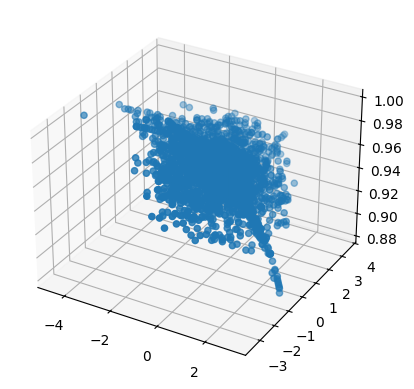

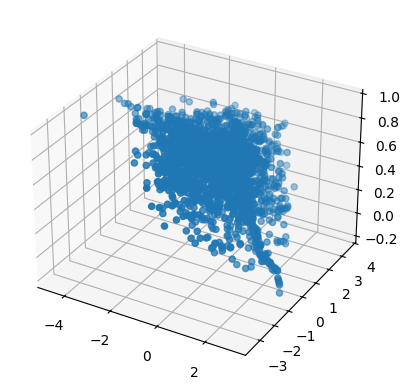

In [4]:
# Mass

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    mPrinDf.iloc[:, [0]].values,
    mPrinDf.iloc[:, [1]].values,
    mPrinDf.iloc[:, [2]].values
)
plt.show()

# Spin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    sPrinDf.iloc[:, [0]].values,
    sPrinDf.iloc[:, [1]].values,
    sPrinDf.iloc[:, [2]].values
)
plt.show()

#### PCA Visualization (Plotly)

In [5]:
# 3D scatter plot for Mass

fig = px.scatter_3d(
    mPrinDf,
    x='PC1',
    y='PC2',
    z='Fmass',
    color='Fmass'
)
fig.update_traces(
    marker=dict(size=1.5, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)
fig.show()

# 3D scatter plot for Spin

fig = px.scatter_3d(
    sPrinDf,
    x='PC1',
    y='PC2',
    z='Fspin',
    color='Fspin'
)
fig.update_traces(
    marker=dict(size=1.5, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)
fig.show()


### Dataset Inspection

In [6]:
# Dataset inspection

display(massdf.shape)
display(spindf.shape)

display(massdf.describe())
display(spindf.describe())

display(massdf.isnull().any())
display(spindf.isnull().any())

(2678, 10)

(2678, 10)

,M1/M2,Spin1x,Spin1y,Spin1z,Spin2x,Spin2y,Spin2z,Fmass,Fmnorm,Fmint
count,2678.000000,2678.000000,2.678000e+03,2678.000000,2678.000000,2678.000000,2.678000e+03,2678.000000,2678.000000,2678.000000
mean,2.374497,0.012618,2.816704e-02,0.008045,-0.009721,0.006536,2.376356e-02,0.959978,0.671252,13.425040
std,1.371202,0.305500,3.016573e-01,0.428401,0.297497,0.278583,4.475187e-01,0.014751,0.128262,2.565243
min,0.948706,-0.849220,-7.973714e-01,-0.969243,-0.849265,-0.788415,-9.692427e-01,0.882780,0.000000,0.000000
25%,1.333374,-0.032704,-9.242500e-07,-0.288601,-0.031039,-0.001002,-2.702112e-01,0.951603,0.598427,11.968541
50%,1.999916,0.000000,0.000000e+00,0.000028,0.000000,0.000000,3.500000e-07,0.960037,0.671758,13.435166
75%,2.999996,0.047954,5.795280e-02,0.305445,0.011418,0.001891,3.500103e-01,0.970425,0.762089,15.241779
max,15.038113,0.886419,8.492906e-01,0.998001,0.884111,0.832108,9.980008e-01,0.997787,1.000000,20.000000


,M1/M2,Spin1x,Spin1y,Spin1z,Spin2x,Spin2y,Spin2z,Fspin,Fsnorm,Fsint
count,2678.000000,2678.000000,2.678000e+03,2678.000000,2678.000000,2678.000000,2.678000e+03,2678.000000,2678.000000,2678.000000
mean,2.374497,0.012618,2.816704e-02,0.008045,-0.009721,0.006536,2.376356e-02,0.628699,0.713289,14.265784
std,1.371202,0.305500,3.016573e-01,0.428401,0.297497,0.278583,4.475187e-01,0.177128,0.157733,3.154652
min,0.948706,-0.849220,-7.973714e-01,-0.969243,-0.849265,-0.788415,-9.692427e-01,-0.172301,0.000000,0.000000
25%,1.333374,-0.032704,-9.242500e-07,-0.288601,-0.031039,-0.001002,-2.702112e-01,0.540384,0.634645,12.692899
50%,1.999916,0.000000,0.000000e+00,0.000028,0.000000,0.000000,3.500000e-07,0.678337,0.757492,15.149839
75%,2.999996,0.047954,5.795280e-02,0.305445,0.011418,0.001891,3.500103e-01,0.746152,0.817881,16.357627
max,15.038113,0.886419,8.492906e-01,0.998001,0.884111,0.832108,9.980008e-01,0.950666,1.000000,20.000000


M1/M2     False
Spin1x    False
Spin1y    False
Spin1z    False
Spin2x    False
Spin2y    False
Spin2z    False
Fmass     False
Fmnorm    False
Fmint     False
dtype: bool

M1/M2     False
Spin1x    False
Spin1y    False
Spin1z    False
Spin2x    False
Spin2y    False
Spin2z    False
Fspin     False
Fsnorm    False
Fsint     False
dtype: bool

### Feature extraction and Train-test split

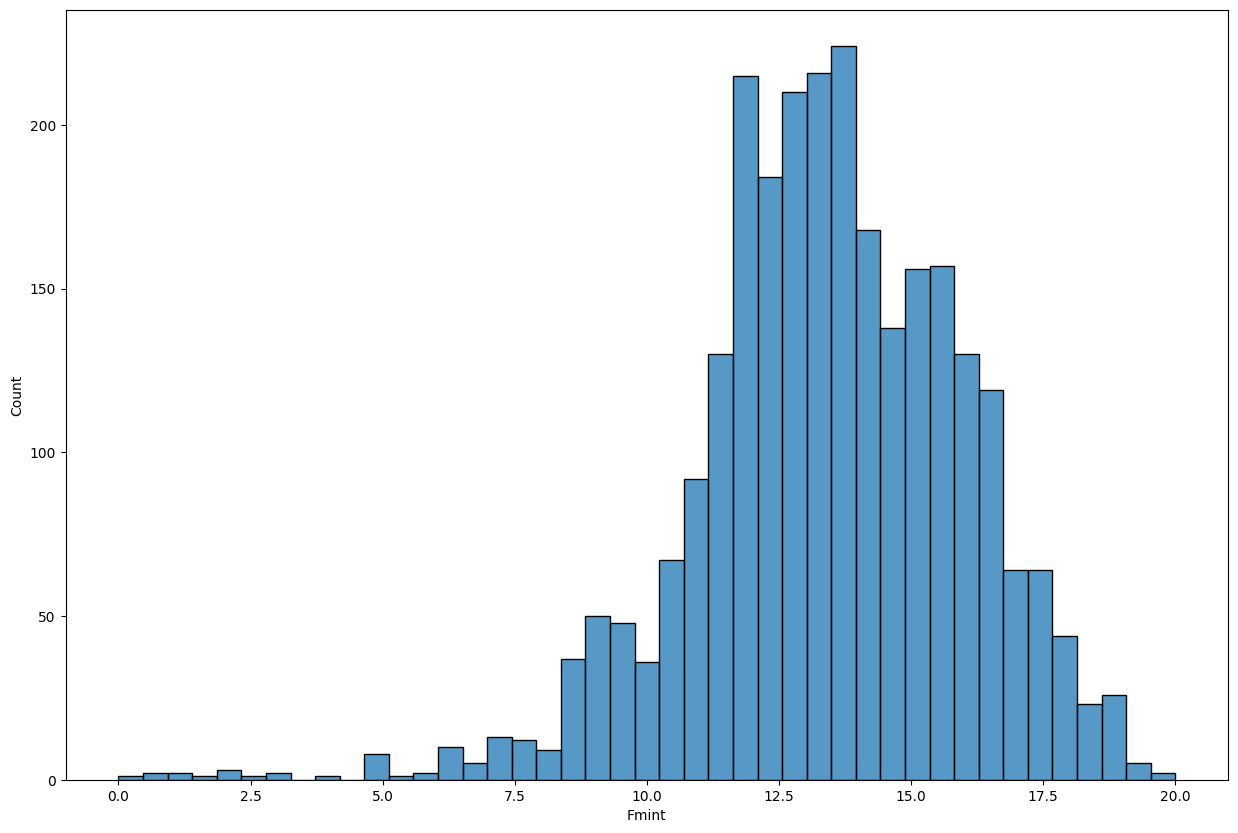

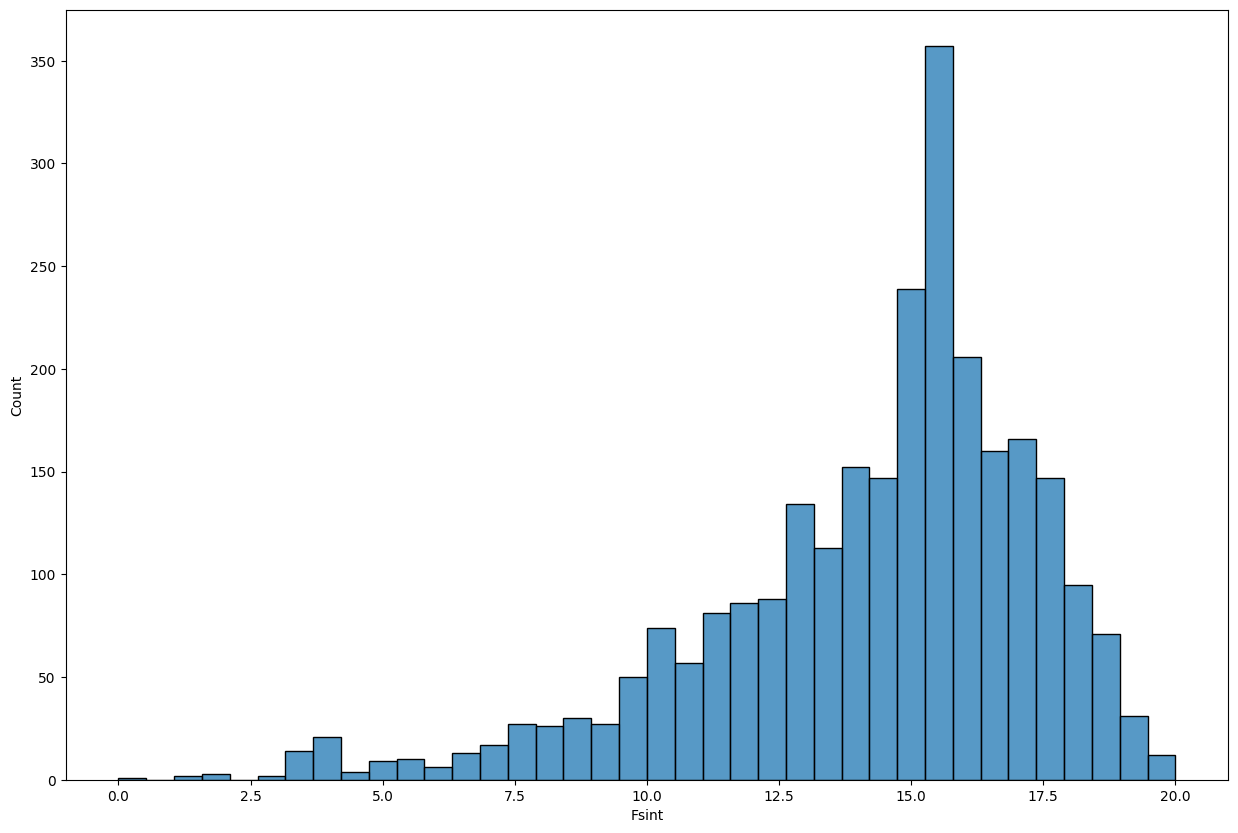

In [7]:
# Feature extraction
mx = massdf.loc[:, features].values
my = massdf.loc[:, ['Fmint']].values.astype(int)
sx = spindf.loc[:, features].values
sy = spindf.loc[:, ['Fsint']].values.astype(int)

# Distribution plots
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.histplot(massdf['Fmint'])

plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.histplot(spindf['Fsint'])

# Train-test split
mx_train, mx_test, my_train, my_test = train_test_split(mx, my, test_size=0.3, random_state=0)
sx_train, sx_test, sy_train, sy_test = train_test_split(sx, sy, test_size=0.3, random_state=0)

### Linear Regression

In [8]:
# Training

mreg = LinearRegression()
display(mreg.fit(mx_train, my_train))

sreg = LinearRegression()
display(sreg.fit(sx_train, sy_train))

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
# Testing

my_pred = mreg.predict(mx_test)
sy_pred = sreg.predict(sx_test)

display(mreg.score(mx_test, my_test))
display(sreg.score(sx_test, sy_test))

0.8374057776590107

0.7132818901232008

In [10]:
# Prediction comparison

mdf = pd.DataFrame({'Actual': my_test.flatten(), 'Predicted': my_pred.flatten()})
sdf = pd.DataFrame({'Actual': sy_test.flatten(), 'Predicted': sy_pred.flatten()})

display(mdf)
display(sdf)

,Actual,Predicted
0,13,13.242983
1,15,13.119984
2,12,11.916989
3,15,13.817922
4,18,18.738994
...,...,...
799,11,11.280648
800,11,11.401948
801,11,10.756918
802,16,16.554195


,Actual,Predicted
0,15,12.236924
1,16,13.607427
2,13,14.125533
3,16,16.485510
4,19,18.931290
...,...,...
799,10,9.795550
800,12,12.587324
801,11,12.269618
802,17,15.019247


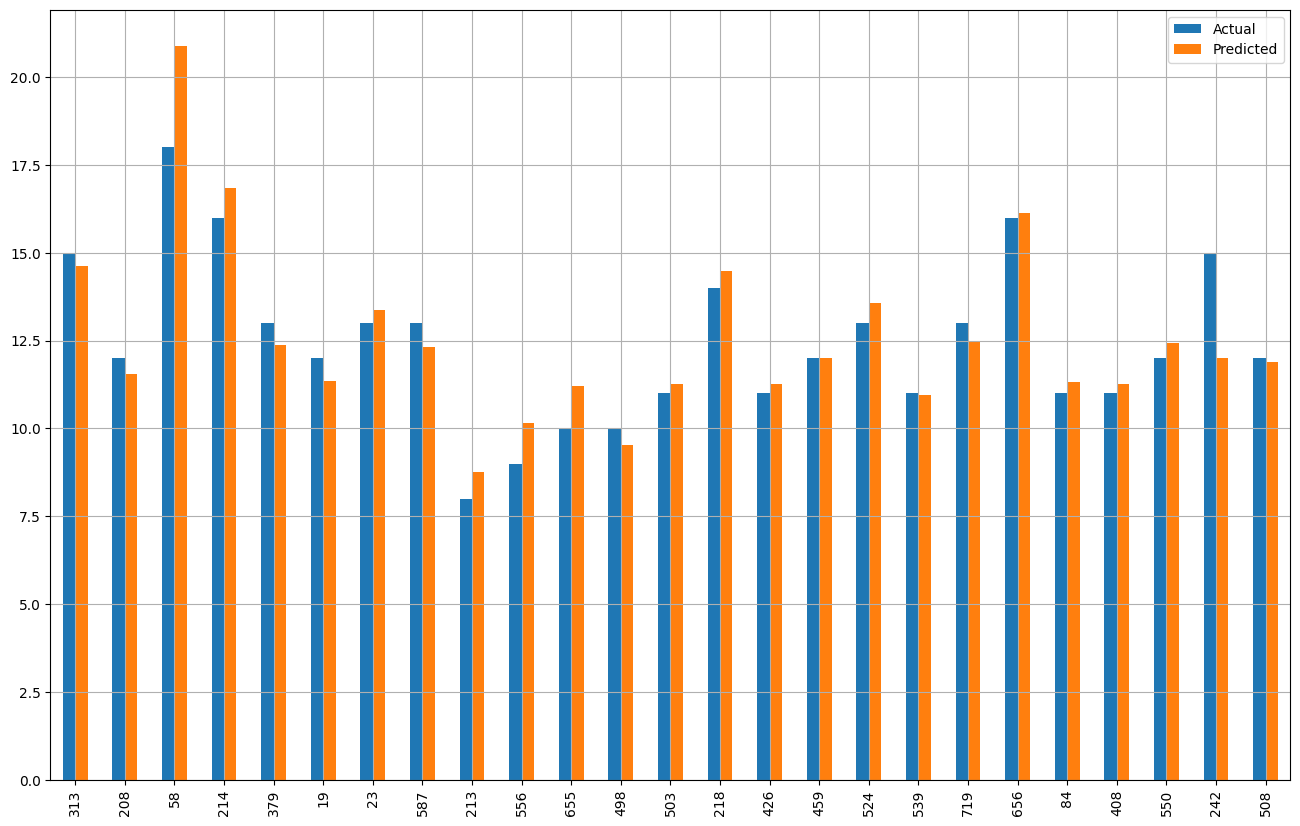

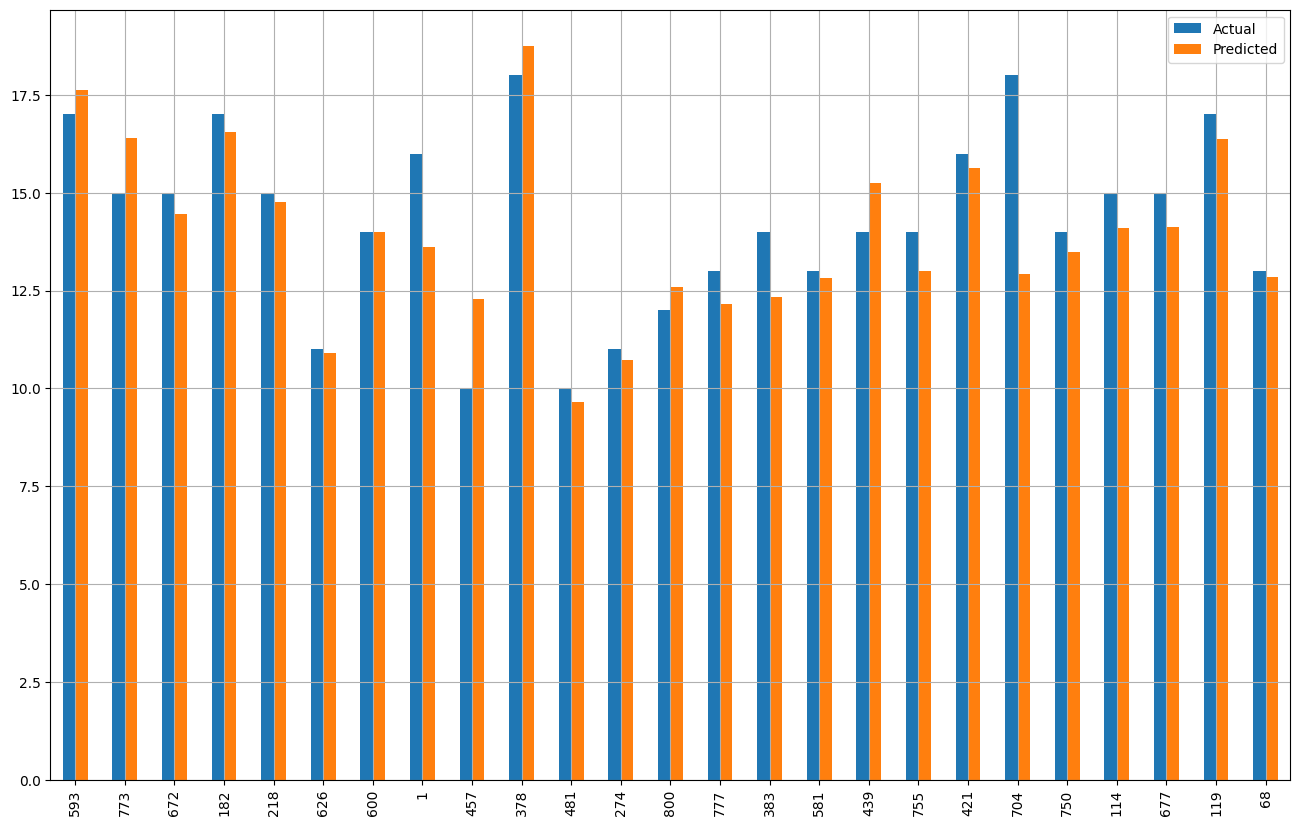

In [11]:
# Visual comparison

df1 = mdf.sample(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid()
plt.show()

df2 = sdf.sample(25)
df2.plot(kind='bar', figsize=(16, 10))
plt.grid()
plt.show()

In [12]:
# Performance metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(my_test, my_pred))
print('Mean Squared Error:', metrics.mean_squared_error(my_test, my_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(my_test, my_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(sy_test, sy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(sy_test, sy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sy_test, sy_pred)))

Mean Absolute Error: 0.7646805652085527
Mean Squared Error: 1.139947193354725
Root Mean Squared Error: 1.067683095939392
Mean Absolute Error: 1.1632936820972632
Mean Squared Error: 2.9444489183994182
Root Mean Squared Error: 1.715939660477436


### Logistic Regression

In [13]:
# Training

mlog = LogisticRegression(max_iter=500)
display(mlog.fit(mx_train, my_train.ravel()))

slog = LogisticRegression(max_iter=500)
display(slog.fit(sx_train, sy_train.ravel()))

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
# Testing

my_pred = mlog.predict(mx_test)
sy_pred = slog.predict(sx_test)

display(mlog.score(mx_test, my_test))
display(slog.score(sx_test, sy_test))

0.47388059701492535

0.32960199004975127

In [15]:
# Prediction comparison

mdf = pd.DataFrame({'Actual': my_test.flatten(), 'Predicted': my_pred.flatten()})
sdf = pd.DataFrame({'Actual': sy_test.flatten(), 'Predicted': sy_pred.flatten()})

display(mdf)
display(sdf)

,Actual,Predicted
0,13,13
1,15,13
2,12,12
3,15,15
4,18,17
...,...,...
799,11,12
800,11,12
801,11,11
802,16,16


,Actual,Predicted
0,15,14
1,16,15
2,13,15
3,16,17
4,19,18
...,...,...
799,10,13
800,12,13
801,11,15
802,17,15


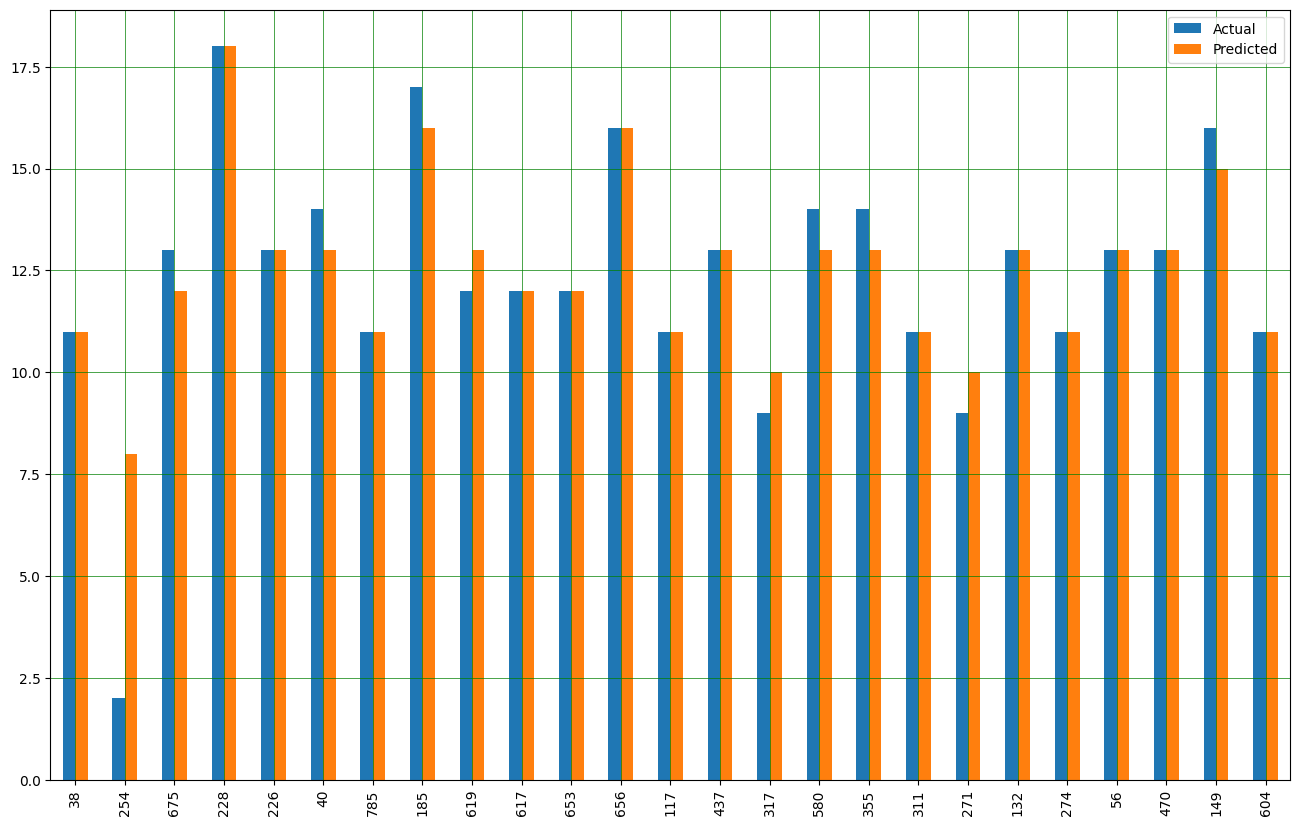

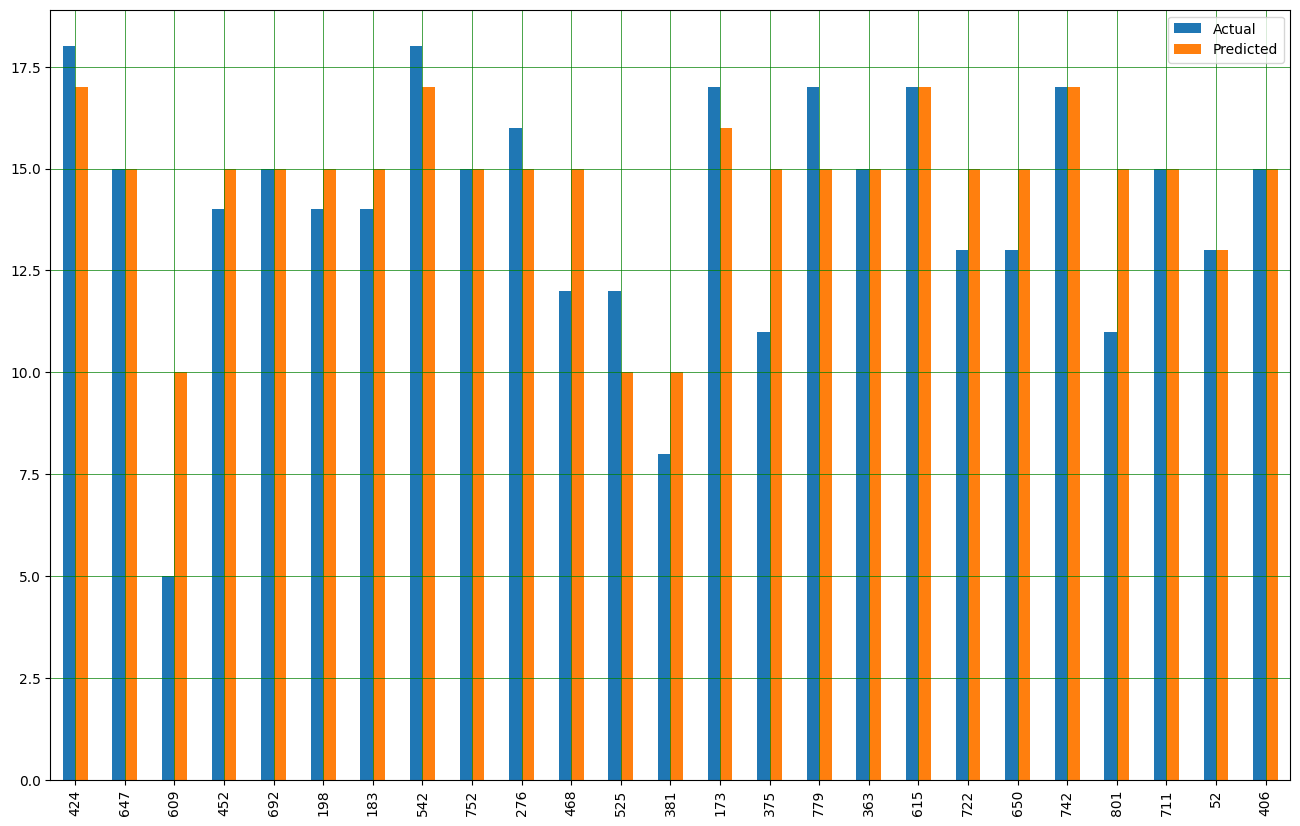

In [16]:
# Visual comparison

df1 = mdf.sample(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

df2 = sdf.sample(25)
df2.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
# Performance metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(my_test, my_pred))
print('Mean Squared Error:', metrics.mean_squared_error(my_test, my_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(my_test, my_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(sy_test, sy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(sy_test, sy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sy_test, sy_pred)))

Mean Absolute Error: 0.7300995024875622
Mean Squared Error: 1.414179104477612
Root Mean Squared Error: 1.1891926271540754
Mean Absolute Error: 1.328358208955224
Mean Squared Error: 4.22636815920398
Root Mean Squared Error: 2.055813259808385


### Decision Tree Classifier

In [18]:
# Training

mdec = DecisionTreeClassifier()
display(mdec.fit(mx_train, my_train.ravel()))

sdec = DecisionTreeClassifier()
display(sdec.fit(sx_train, sy_train.ravel()))

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [19]:
# Testing

my_pred = mdec.predict(mx_test)
sy_pred = sdec.predict(sx_test)

display(mdec.score(mx_test, my_test))
display(sdec.score(sx_test, sy_test))

0.7002487562189055

0.6156716417910447

In [20]:
# Prediction comparison

mdf = pd.DataFrame({'Actual': my_test.flatten(), 'Predicted': my_pred.flatten()})
sdf = pd.DataFrame({'Actual': sy_test.flatten(), 'Predicted': sy_pred.flatten()})

display(mdf)
display(sdf)

,Actual,Predicted
0,13,13
1,15,15
2,12,12
3,15,15
4,18,18
...,...,...
799,11,11
800,11,12
801,11,11
802,16,16


,Actual,Predicted
0,15,14
1,16,14
2,13,15
3,16,17
4,19,18
...,...,...
799,10,10
800,12,13
801,11,11
802,17,17


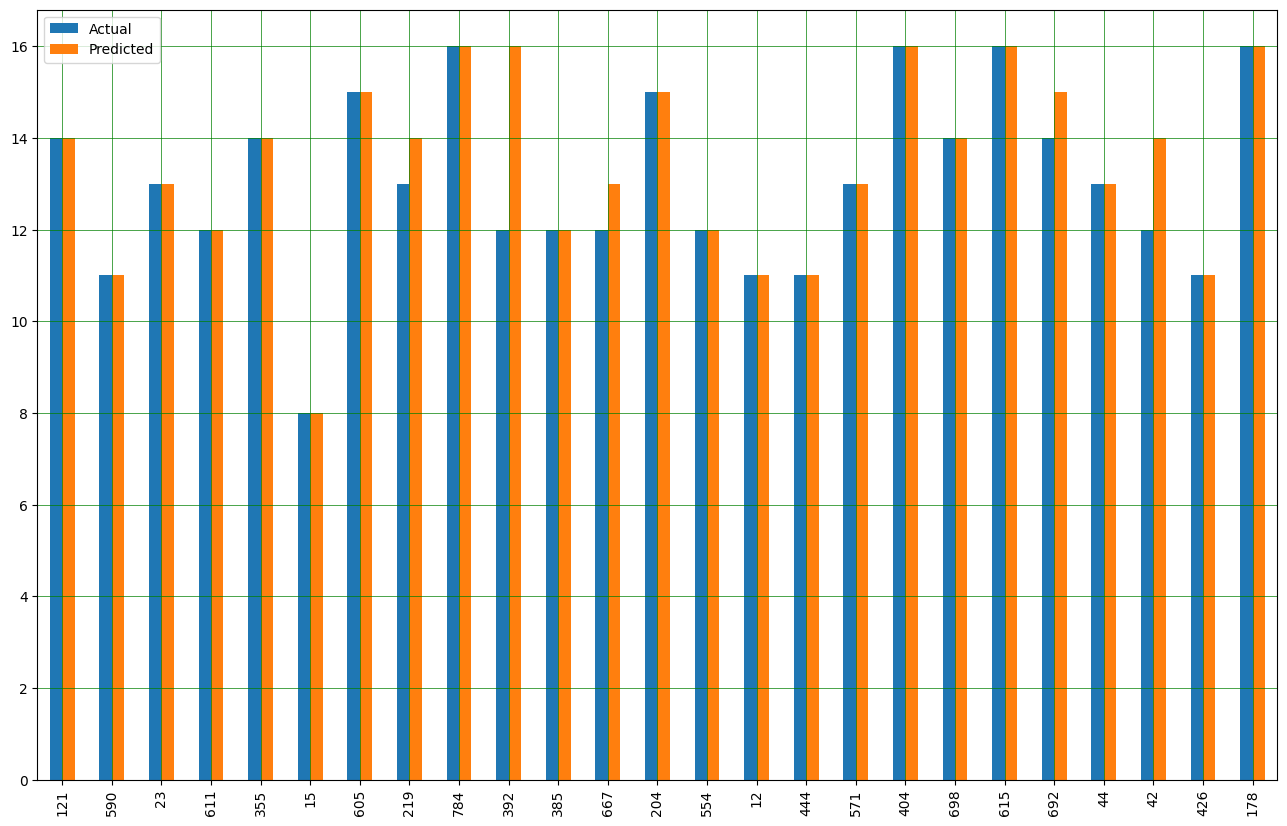

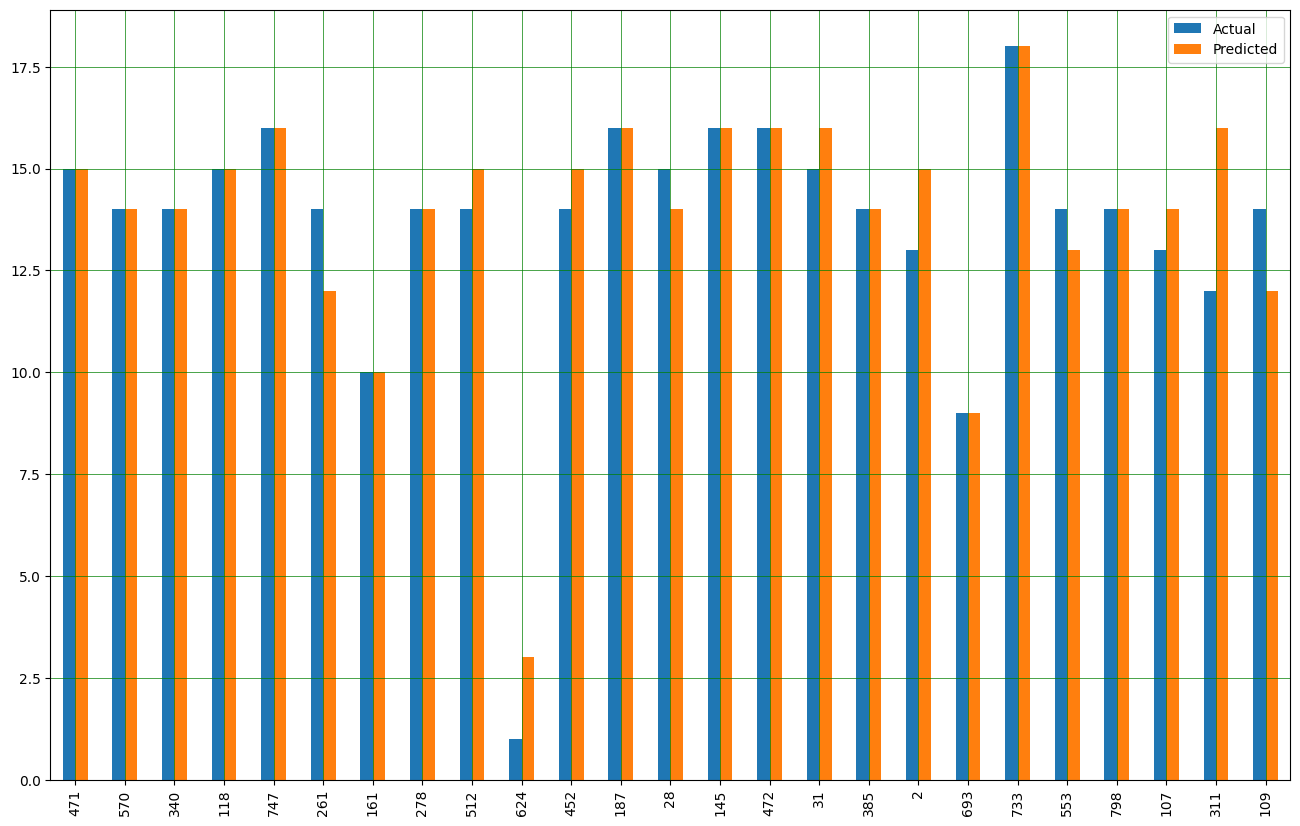

In [21]:
# Visual comparison

df1 = mdf.sample(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

df2 = sdf.sample(25)
df2.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
# Performance metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(my_test, my_pred))
print('Mean Squared Error:', metrics.mean_squared_error(my_test, my_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(my_test, my_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(sy_test, sy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(sy_test, sy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sy_test, sy_pred)))

Mean Absolute Error: 0.3818407960199005
Mean Squared Error: 0.6206467661691543
Root Mean Squared Error: 0.7878113772783142
Mean Absolute Error: 0.6791044776119403
Mean Squared Error: 2.390547263681592
Root Mean Squared Error: 1.546139470966831


### Support Vector Machine

In [23]:
# Training

mclf = svm.SVC()
display(mclf.fit(mx_train, my_train.ravel()))

sclf = svm.SVC()
display(sclf.fit(sx_train, sy_train.ravel()))

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [24]:
# Testing

my_pred = mclf.predict(mx_test)
sy_pred = sclf.predict(sx_test)

display(mclf.score(mx_test, my_test))
display(sclf.score(sx_test, sy_test))

0.6256218905472637

0.4017412935323383

In [25]:
# Prediction comparison

mdf = pd.DataFrame({'Actual': my_test.flatten(), 'Predicted': my_pred.flatten()})
sdf = pd.DataFrame({'Actual': sy_test.flatten(), 'Predicted': sy_pred.flatten()})

display(mdf)
display(sdf)

,Actual,Predicted
0,13,13
1,15,14
2,12,12
3,15,15
4,18,17
...,...,...
799,11,11
800,11,12
801,11,11
802,16,16


,Actual,Predicted
0,15,14
1,16,15
2,13,15
3,16,17
4,19,18
...,...,...
799,10,11
800,12,13
801,11,15
802,17,17


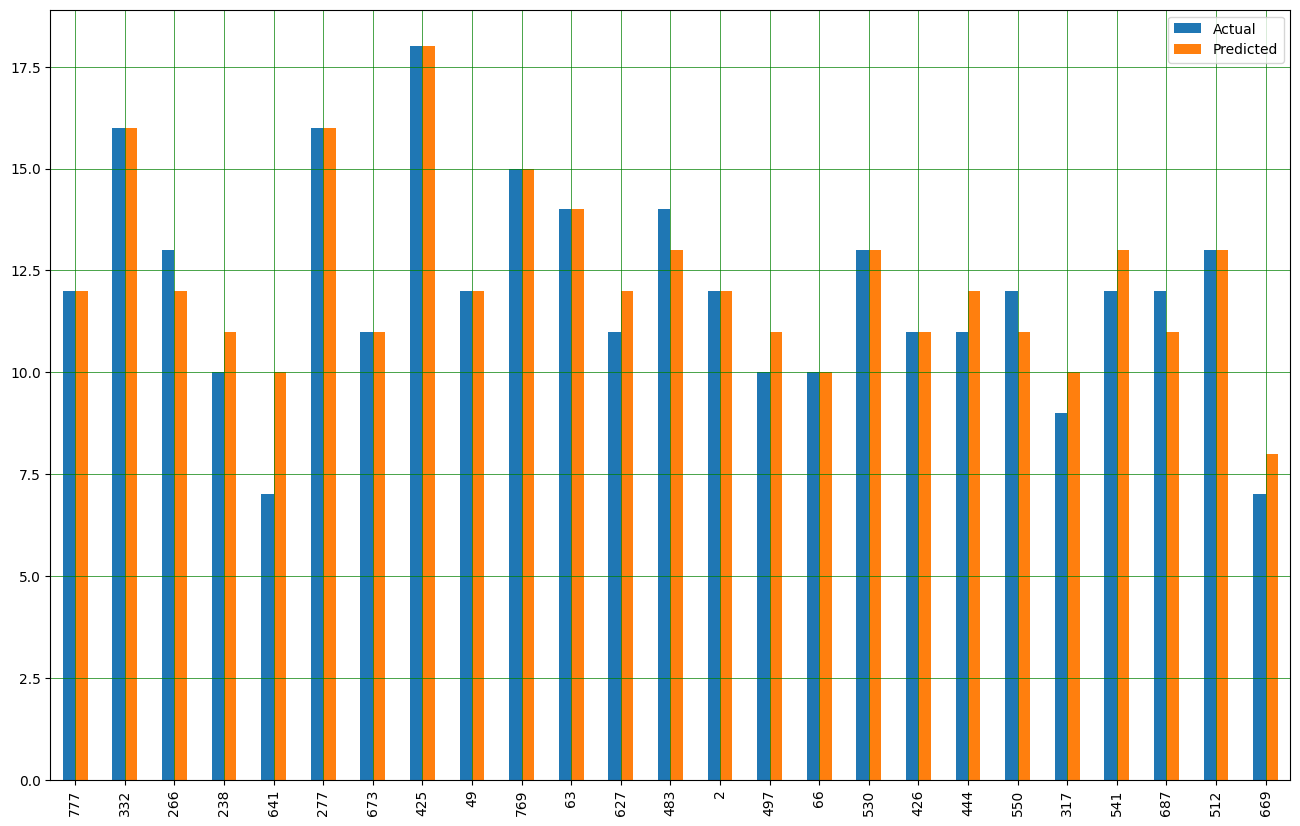

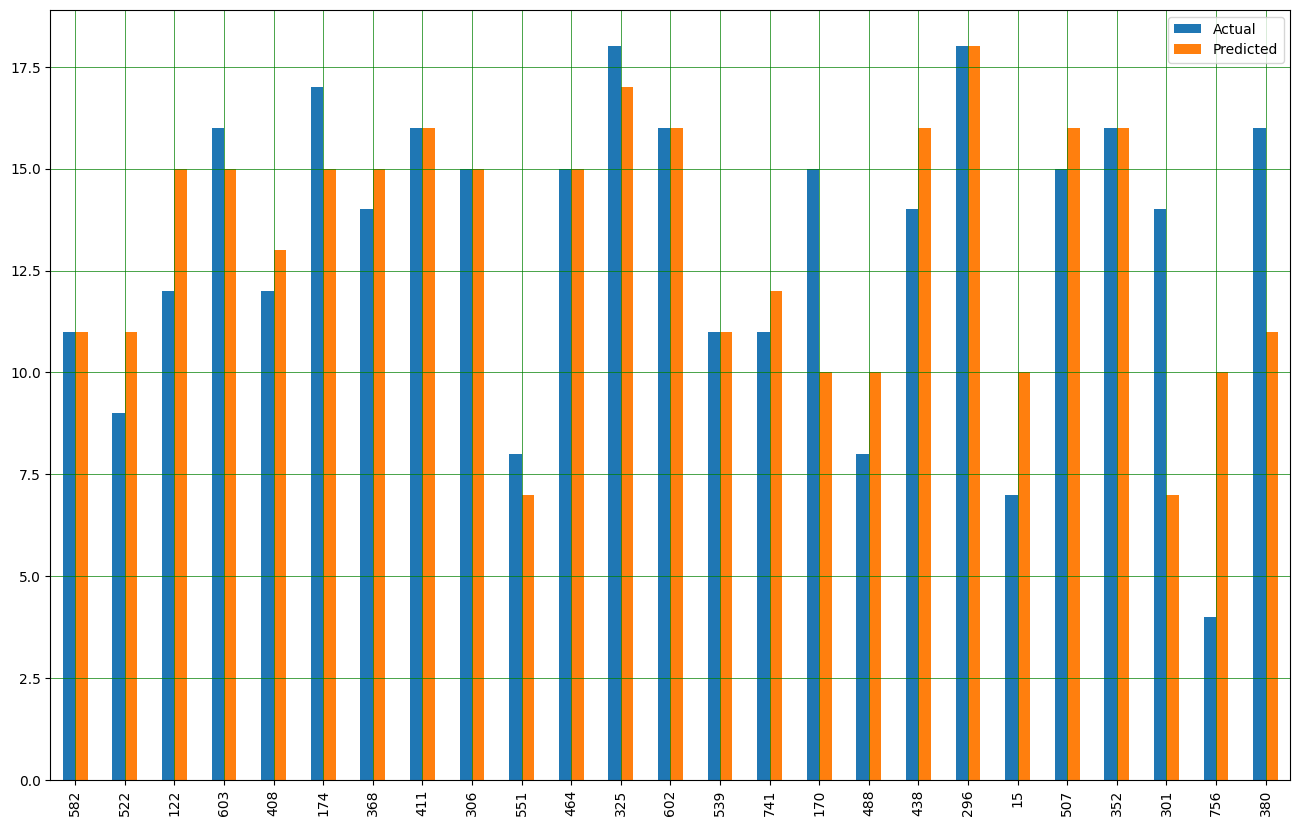

In [26]:
# Visual comparison

df1 = mdf.sample(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

df2 = sdf.sample(25)
df2.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
# Performance metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(my_test, my_pred))
print('Mean Squared Error:', metrics.mean_squared_error(my_test, my_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(my_test, my_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(sy_test, sy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(sy_test, sy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sy_test, sy_pred)))

Mean Absolute Error: 0.5335820895522388
Mean Squared Error: 1.2077114427860696
Root Mean Squared Error: 1.098959254379374
Mean Absolute Error: 1.095771144278607
Mean Squared Error: 3.7524875621890548
Root Mean Squared Error: 1.9371338524193558


### Neural Network (MLP)

In [28]:
# Training

mmlp = MLPClassifier(
    hidden_layer_sizes=(1000, 1000),
    max_iter=1000,
    activation='relu'
)
display(mmlp.fit(mx_train, my_train.ravel()))

smlp = MLPClassifier(
    hidden_layer_sizes=(1000, 1000),
    max_iter=1000,
    activation='relu'
)
display(smlp.fit(sx_train, sy_train.ravel()))

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(1000, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",1000
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",None


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(1000, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",1000
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",None


In [29]:
# Testing

my_pred = mmlp.predict(mx_test)
sy_pred = smlp.predict(sx_test)

display(mmlp.score(mx_test, my_test))
display(smlp.score(sx_test, sy_test))

0.7873134328358209

0.7052238805970149

In [30]:
# Prediction comparison
 
mdf = pd.DataFrame({'Actual': my_test.flatten(), 'Predicted': my_pred.flatten()})
sdf = pd.DataFrame({'Actual': sy_test.flatten(), 'Predicted': sy_pred.flatten()})

display(mdf)
display(sdf)

,Actual,Predicted
0,13,13
1,15,15
2,12,12
3,15,15
4,18,18
...,...,...
799,11,11
800,11,12
801,11,11
802,16,16


,Actual,Predicted
0,15,14
1,16,15
2,13,15
3,16,17
4,19,19
...,...,...
799,10,11
800,12,13
801,11,11
802,17,17


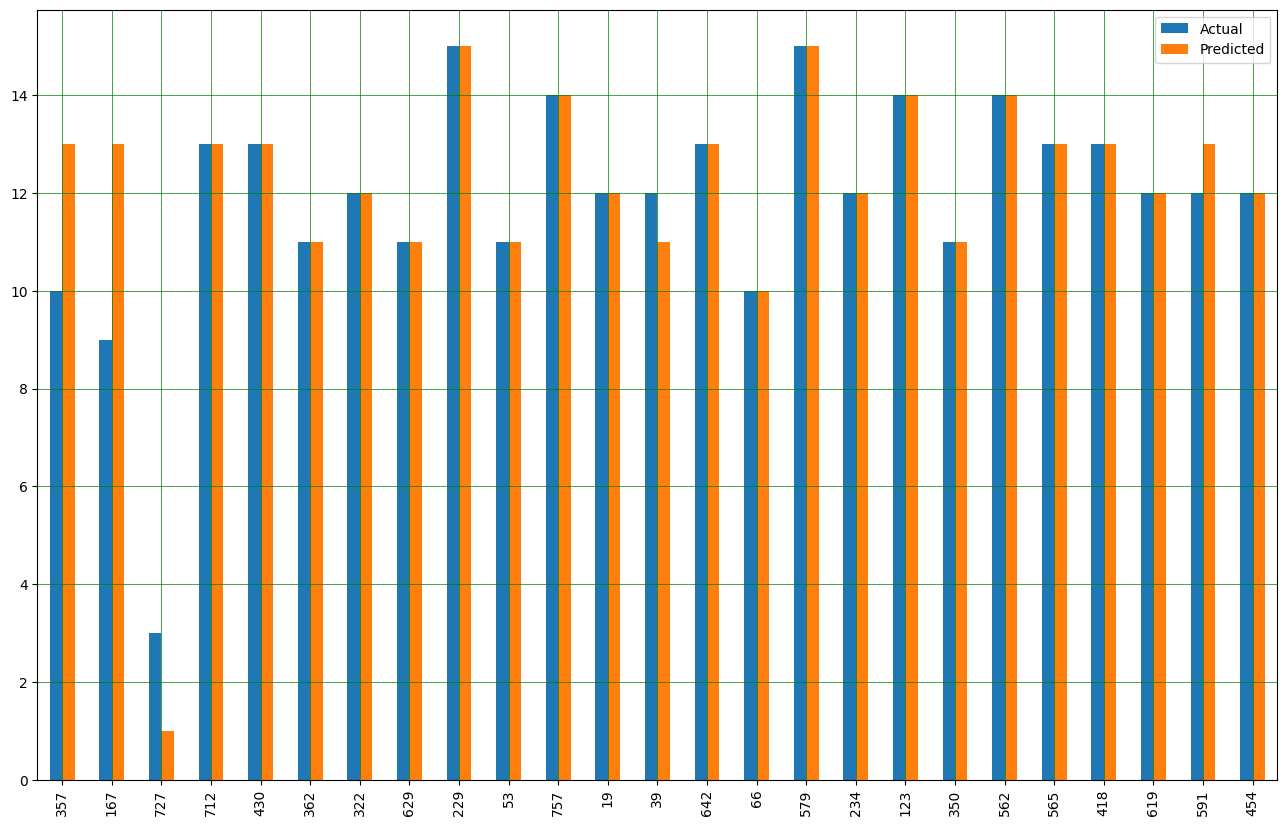

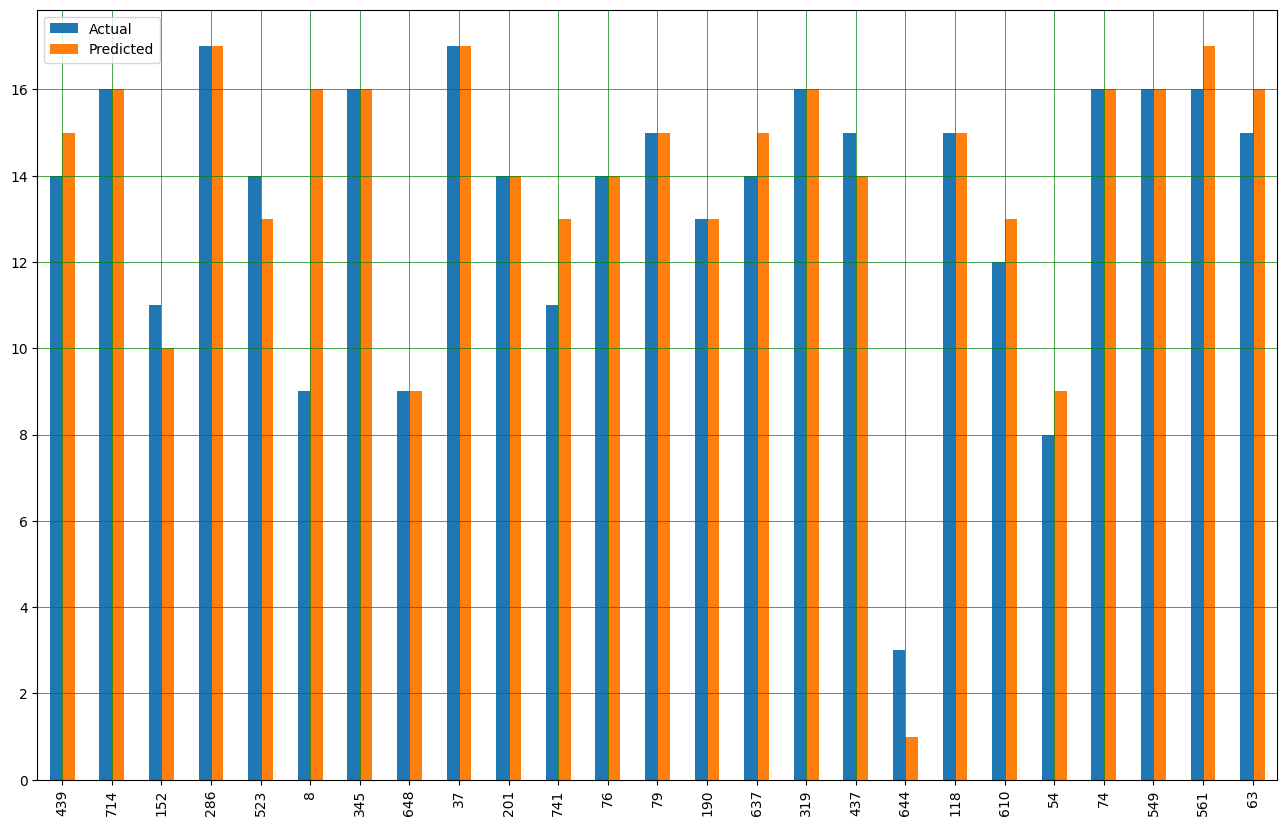

In [31]:
# Visual comparison

df1 = mdf.sample(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

df2 = sdf.sample(25)
df2.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
# Performance metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(my_test, my_pred))
print('Mean Squared Error:', metrics.mean_squared_error(my_test, my_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(my_test, my_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(sy_test, sy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(sy_test, sy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sy_test, sy_pred)))

Mean Absolute Error: 0.27238805970149255
Mean Squared Error: 0.47388059701492535
Root Mean Squared Error: 0.6883898583033639
Mean Absolute Error: 0.5149253731343284
Mean Squared Error: 1.9577114427860696
Root Mean Squared Error: 1.3991824194100173


## Endnotes

The results suggest that machine learning models can capture certain relationships between physical parameters in numerical relativity data. However, the simplicity of the models and limited feature set restrict predictive accuracy.

- The dataset size is limited relative to the complexity of the physical system.
- Only basic machine learning techniques are explored.
- Feature engineering is minimal.

Future work could explore larger datasets, more expressive models, and deeper integration with waveform-level data.

This notebook demonstrates a proof-of-concept application of machine learning to numerical relativity data describing binary black hole mergers. While exploratory in nature, the study provides valuable insight into the intersection of physics-based simulations and data-driven modeling.